<h1 style="text-align: center;" markdown="1">My first Linear Regression with kaggle titanic datasets</h1> 



In [18]:
# All our imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
#Write the code to read the csv file to a dataframe df
df = pd.read_csv("titanic.csv")
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [20]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [21]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


# Variable Metadata <a class="anchor" id="variables"></a>
**Pclass:** A proxy for socio-economic status (SES)

1 = Upper

2 = Middle

3 = Lower

**Age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**SibSp:** The dataset defines family relations in this way:

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)


**Parch:** The dataset defines family relations in this way:
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

**Embarked:** The port from where the particular passenger was embarked/boarded. 

**Survived:** 
0: if the person did not survive
1: if the person survived

In [6]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [7]:
df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Survived       False
dtype: bool

# Correlation between variables<a class="anchor" id="correlation"></a>

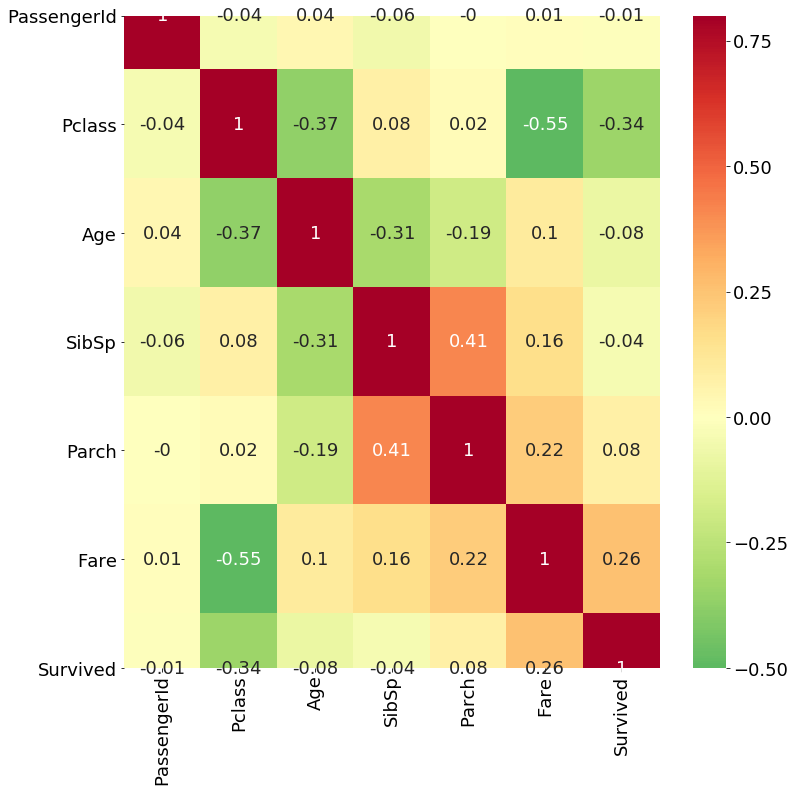

In [9]:
variables = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived']
# Calculate the correlations
corr_mat = df[variables].corr().round(2)

# Draw a correlation heatmap
plt.rcParams['font.size'] = 18
plt.figure(figsize = (12, 12))
sns.heatmap(corr_mat, vmin = -0.5, vmax = 0.8,  center = 0, 
            cmap = plt.cm.RdYlGn_r, annot = True);

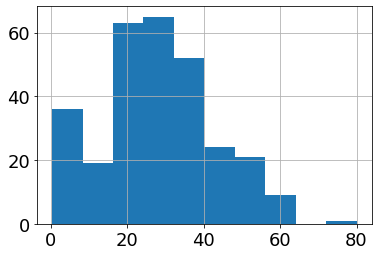

In [10]:
df[df['Survived']==1].Age.hist()

In [11]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [12]:
df.groupby(['Embarked', 'Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

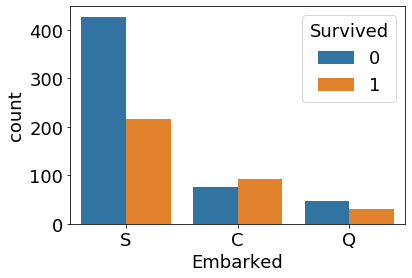

In [13]:
sns.countplot('Embarked',hue='Survived',data=df)

In [14]:
df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

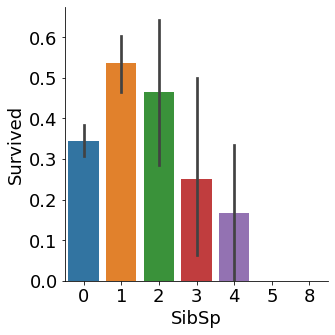

In [15]:
sns.catplot(x="SibSp", y="Survived", data=df,  kind="bar")

# Dummy variables for categorical data <a class="anchor" id="dummy"></a>
Sex and Embarked are categorical data. We will eventually be using Scikit-learn to create our ML model which expects numeric data. We will have to convert categorical variable into dummy/indicator variables.

In [16]:
# Try this, what do you see
pd.get_dummies(df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [23]:
sex = pd.get_dummies(df['Sex'], drop_first = True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [33]:
embarked= pd.get_dummies(df['Embarked'], drop_first=True)
embarked.head(6)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0


In [34]:
# Removing Categorical Columns and Columns we decided not to use 
df.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)

In [35]:
# what does the dataset look like now
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,Survived
0,1,3,22.0,1,0,7.2500,NaN,0
1,2,1,38.0,1,0,71.2833,C85,1
2,3,3,26.0,0,0,7.9250,NaN,1
3,4,1,35.0,1,0,53.1000,C123,1
4,5,3,35.0,0,0,8.0500,NaN,0


In [36]:
df = pd.concat([df, sex, embarked], axis = 1)

In [105]:

def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(df[df["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age
df["Age"] = df[["Age", "Pclass"]].apply(add_age,axis=1)
df.isnull().sum()

PassengerId      0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Survived         0
male             0
Q                0
S                0
dtype: int64

Also, PassengerID is simply used for identification purposes, and Survived holds the "label" data for our result. We can get rid of these columns. The Survived column is the data we feed the machine learning algorithms to learn from.  

In [112]:
traning_data_set = df.drop(['PassengerId','Survived','Cabin'], axis=1)

In [113]:
traning_data_set


,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,25.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [131]:
x = traning_data_set
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1234)

In [132]:
X_train.shape, X_test.shape, y_train.shape, X_test.shape

((623, 8), (268, 8), (623,), (268, 8))

In [133]:
model = LogisticRegression()

In [134]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
# Let us fit our training data
model.fit(X_train, y_train)

C:\Users\puspa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
predictions = model.predict(X_test)

In [138]:
# What did we predict?
predictions

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0], dtype=int64)

In [ ]:
# What did our test dataset look like?

In [139]:
df_compare = X_test.reset_index(drop=True)

In [140]:
df_compare.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,44.0,0,1,57.9792,0,0,0
1,3,25.0,0,0,7.7375,1,1,0
2,3,25.0,0,0,14.5000,1,0,1
3,1,54.0,1,0,78.2667,0,0,0
4,1,36.0,0,0,40.1250,1,0,0


In [141]:
#Adding columns 'Survived' and 'Predicted' to df_compare.
df_compare['Survived'] = y_test.values

In [142]:
df_compare['Predicted'] = predictions

In [143]:
df_compare.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived,Predicted
0,1,44.0,0,1,57.9792,0,0,0,1,1
1,3,25.0,0,0,7.7375,1,1,0,0,0
2,3,25.0,0,0,14.5000,1,0,1,0,0
3,1,54.0,1,0,78.2667,0,0,0,1,1
4,1,36.0,0,0,40.1250,1,0,0,0,0


In [144]:
# We can now check the accuracy of the model.
df_compare.loc[df_compare.Survived==df_compare.Predicted].shape

(221, 10)

In [145]:
df_compare.loc[df_compare.Survived==df_compare.Predicted].shape[0]/df_compare.shape[0]

0.8246268656716418

In [146]:
#Alternatively, you can also call the score function to calculate the accuracy of the algorithm
model.score(X_test,y_test)

0.8246268656716418

In [147]:
confusion_matrix(y_test, predictions)

array([[150,  16],
       [ 31,  71]], dtype=int64)

In our context,

*   True Positive: (Good) People who really survived were predicted to survive.
*   True Negative: (Good) People who really did not survive were predicted to not survive. 
*   False Positive: (Bad) People who really did not survive were predicted to survive.
*   False Negative: (Bad) People who really survived were predicted to not survive. 


But wait, is accuracy a good indication of how good/bad a model is? 

There are 284335 good credit card transactions and 472 fradulent transactions. Can you come up with a model that has over 99% accuracy?

In [148]:
total_transactions = 284335 + 472

In [149]:
# Let us say we wrote a bad model which predicts everything to be not fradulent
not_fraud = total_transactions
correct_prediction = not_fraud - 472

In [150]:
accuracy = correct_prediction / total_transactions * 100

In [151]:
accuracy

99.83427373624946

The accuracy of the model is 99%. But what is the problem?

Since evaluation of a model based on the accuracy metric does not always provide how good or bad of a model we have built, there are other metrics that can be used:
  Learn more here: https://en.wikipedia.org/wiki/Precision_and_recall